In [1]:
import pandas as pd
from pandas import Series,DataFrame


In [2]:
#initialize a df with data
titanic_df = pd.read_csv('train.csv')

#a preview of the first few rows of data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Q1. who were the passengers on the titanic

In [4]:
# Let's import what we'll need for the analysis and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

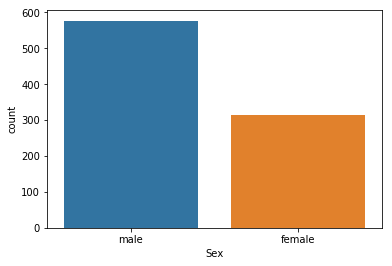

In [5]:
#Factorplot as been deprecated, now we use countplot 
sns.countplot('Sex',data=titanic_df)

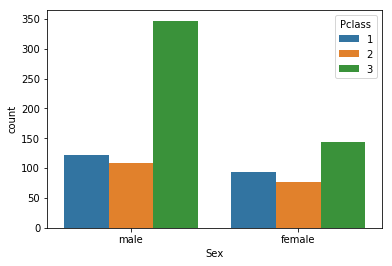

In [6]:
#Now let's seperate the genders by classes, 
sns.countplot('Sex',data=titanic_df,hue='Pclass')

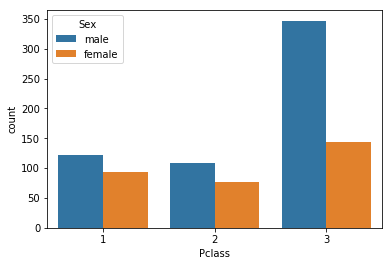

In [7]:
sns.countplot('Pclass',data=titanic_df,hue='Sex')

In [8]:
def male_female_child(passenger):
    age,sex=passenger
    if(age<16):
        return 'child'
    else:
        return sex

# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [9]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


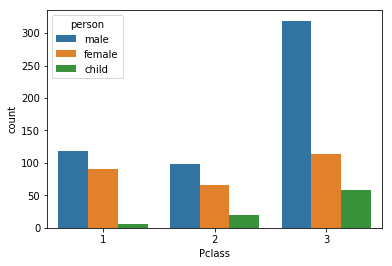

In [10]:
sns.countplot('Pclass',data=titanic_df,hue='person')

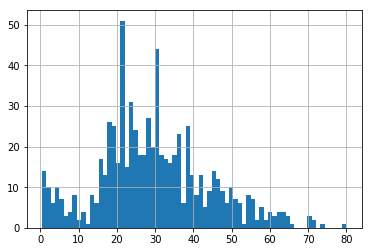

In [11]:
titanic_df['Age'].hist(bins=70)

In [12]:
titanic_df['Age'].mean()

29.69911764705882

In [13]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

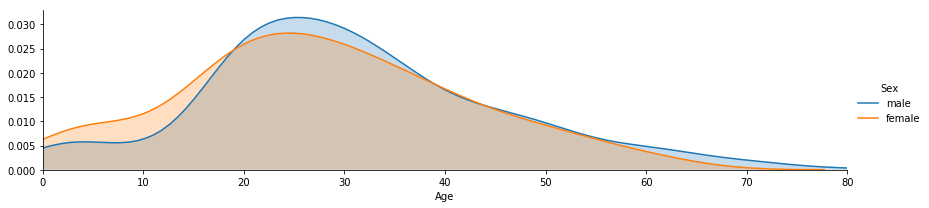

In [14]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

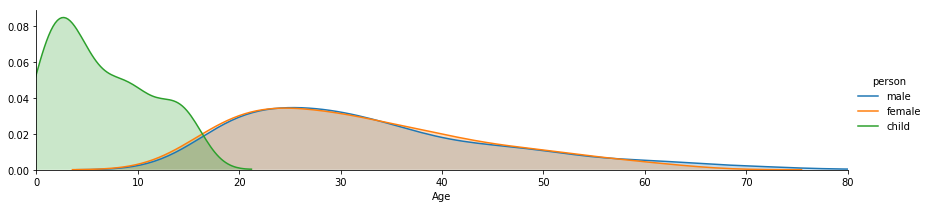

In [15]:
# we could do the same to include child
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

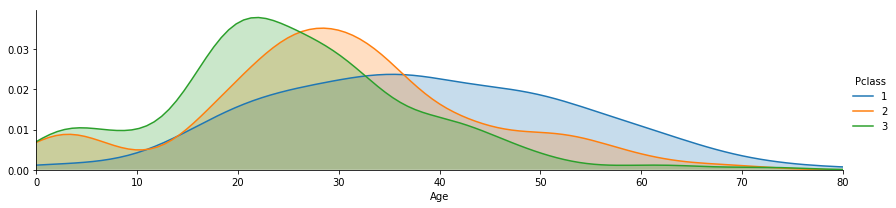

In [16]:
# we could do the same for class
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

Q2. What deck were the passengers on and how does that relate to their class?

In [17]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [18]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

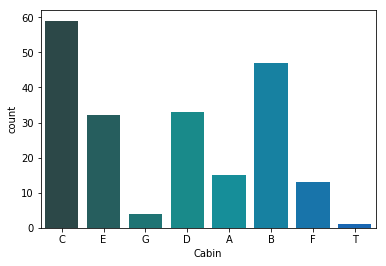

In [19]:
#Notice we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

levels = []

#to grab the first letter for the deck name
for level in deck:
    levels.append(level[0])

# Reset DataFrame and use factor plot
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin',data = cabin_df, palette = 'winter_d')

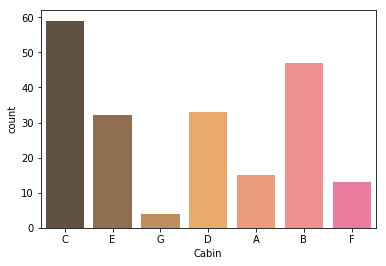

In [20]:
# Redefine cabin_df as everything but where the row was equal to 'T'
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#Replot
sns.countplot('Cabin',data=cabin_df,palette='spring_d')

Quick note: I used 'winter_d' and 'spring_d' as my palettes, but you can choose any palette you want. Check out this link for more palette names, you can add '_d' to the end of any palette name to make it darker.

Link: http://matplotlib.org/users/colormaps.html

Q3. Where did the passengers come from?

In [21]:
# Let's take another look at our original data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Note here that the Embarked column has C,Q,and S values. Reading about the project on Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.

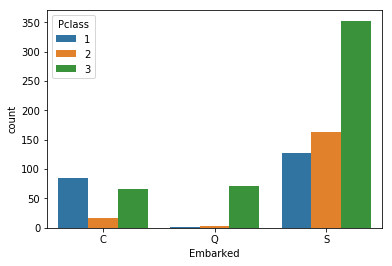

In [22]:
sns.countplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'])

interesting that in Queenstown almost all the people were from third class

Q4.  Who was alone and who was with family?

In [23]:

# Let's start by adding a new column to define alone

# We'll add the parent/child column with the sibsp column
titanic_df['Alone'] =  titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [24]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

C:\Users\User\Anaconda2\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


the error, that's kind of just a warning to make sure you're not accidentally working on a copy instead of working on the original.

For more info check out this link
url_info = 'http://stackoverflow.com/questions/20625582/how-to-deal-with-this-pandas-warning'

In [25]:
titanic_df['Alone'].head()

0    With Family
1    With Family
2          Alone
3    With Family
4          Alone
Name: Alone, dtype: object

In [26]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


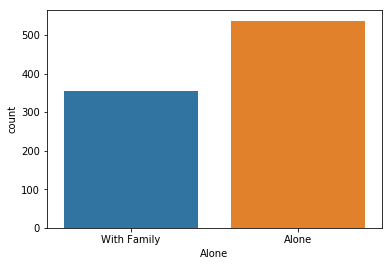

In [27]:
sns.countplot('Alone',data=titanic_df)

Now that we've throughly analyzed the data let's go ahead and take a look at the most interesting (and open-ended) question: What factors helped someone survive the sinking?

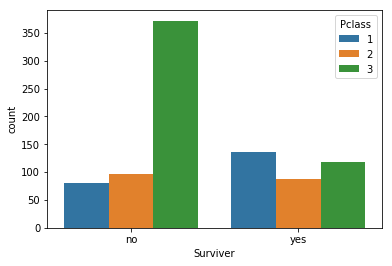

In [28]:
titanic_df['Surviver'] = titanic_df.Survived.map({0: "no", 1: "yes"})

# Let's just get a quick overall view of survied vs died. 
sns.countplot("Surviver", data = titanic_df, hue="Pclass")

If you've ever seen the movie Titanic, that really popularized the notion that third class passengers did not do as well as their first and second class counterparts.

Let's use some data analysis to see if that's true or not.

C:\Users\User\Anaconda2\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


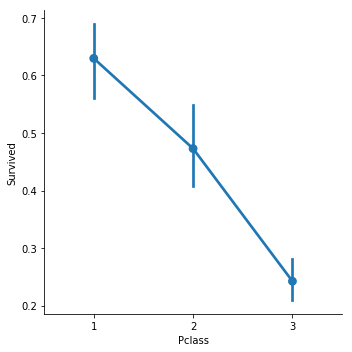

In [29]:
# we can also visualize this using factorplot:

sns.factorplot("Pclass",'Survived',data=titanic_df)

we can see that the survival rate of 3rd class people are substantially lower than any other class.
let's see if this is due to large amount of men in third class category since there was a Women and Child first policy

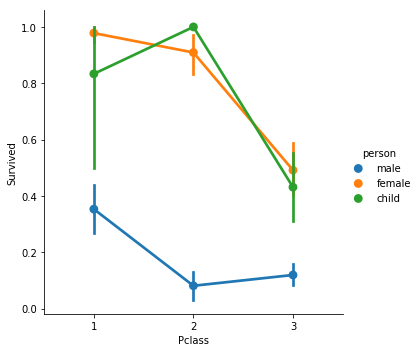

In [30]:
# Let's use a factor plot again, but now considering class and gender
sns.factorplot('Pclass','Survived',hue='person',data=titanic_df)

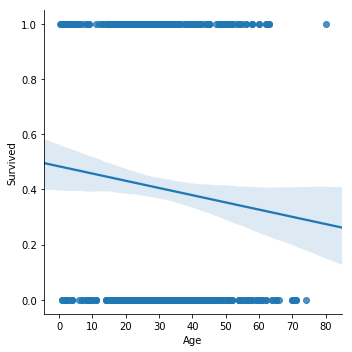

In [31]:
# we can also check if age is a factor
# Let's use a linear plot on age versus survival

sns.lmplot('Age','Survived',data=titanic_df)

Looks like a general trend that older the passenger was, the less likely they survived. Let's use hue to see the effect of class and age

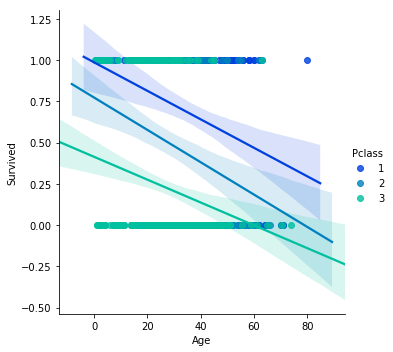

In [32]:
# Let's use a linear plot on age versus survival using hue for class seperation
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

Looks like there's still quite a bit more deaths in the third class and we can use the x bin argument to clean up this figure a little bit more instead of having every single data point in this figure.

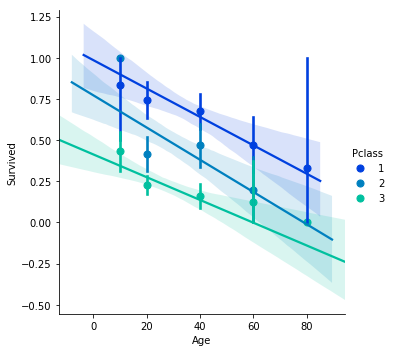

In [33]:
# Let's use a linear plot on age versus survival using hue for class seperation
#we're gonna make some age bins, and grab all the points that are closest
generations=[10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

you can see there's a really high standard deviation on the older people in the first class, which is an interesting find.

What about if we relate gender and age with the survival set?

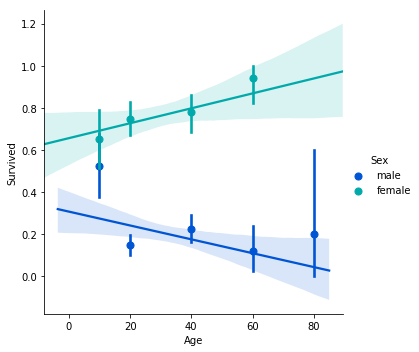

In [34]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

Q. Did the deck have an effect on the passengers survival rate

In [52]:
cab_surviveDF = titanic_df[['Cabin','Survived','Pclass','Alone']]

In [53]:

levels = []

#to grab the first letter for the deck name
for level in deck:
    levels.append(level[0])

# Reset DataFrame and use factor plot
cab_surviveDF['Cabin'] = DataFrame(levels)


C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [54]:
cab_surviveDF.dropna()
cab_surviveDF = cab_surviveDF[cab_surviveDF.Cabin != 'T']

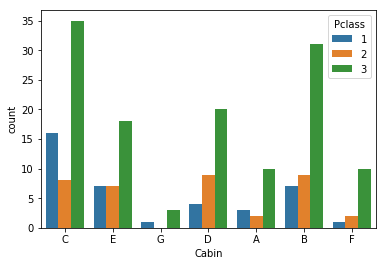

In [55]:
sns.countplot("Cabin",data=cab_surviveDF,hue="Pclass")

Did having a family member increase the odds of surviving the crash?

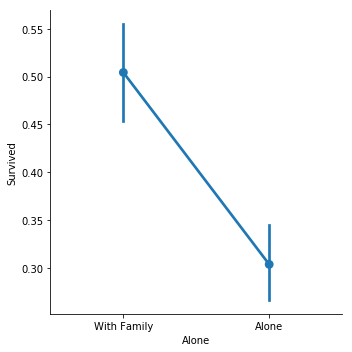

In [59]:
sns.factorplot("Alone","Survived",data=cab_surviveDF)

#as per the charts we can see that in C deck there were majority of 3rd class people and the survival rate in C class is less.
and people who were alone also had less survival rate